In [3]:
import tensorflow.keras as keras
import tensorflow.keras.layers as keras_layers
import tensorflow.keras.models as keras_models
import tensorflow.keras.optimizers as keras_optimizers
import tensorflow.keras.losses as keras_losses
import tensorflow.keras.metrics as keras_metrics
import tensorflow.keras.utils as keras_utils

import pandas
import numpy
import matplotlib.pyplot as pyplot

import sklearn.model_selection as sklearn_model_selection
import sklearn.datasets as sklearn_datasets
import sklearn.preprocessing as sklearn_preprocessing

In [4]:
dataset = sklearn_datasets.load_breast_cancer()
standard_scaler = sklearn_preprocessing.StandardScaler()
standard_scaler.fit(dataset.data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
test_size = 0.2
x_train, x_test, y_train, y_test = sklearn_model_selection.train_test_split(
    standard_scaler.transform(dataset.data), dataset.target, test_size=test_size)

In [6]:
input_layer = keras_layers.Input(shape=x_train[0].shape)

output_dimension = 1
output_layer = keras_layers.Dense(
    output_dimension, activation=keras.activations.sigmoid)(input_layer)

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
learning_rate = 0.0001
optimizer = keras_optimizers.SGD(lr=learning_rate)
loss = keras_losses.binary_crossentropy
metrics = [keras_metrics.Accuracy()]

In [8]:
model = keras.models.Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [ ]:
epochs = 3000
no_print_output = 0
history = model.fit(x=x_train, y=y_train, epochs=epochs, verbose=no_print_output, validation_data=(x_test, y_test))

In [8]:
pyplot.plot(history.history['loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')

NameError: name 'history' is not defined

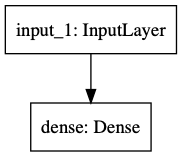

In [22]:
keras_utils.plot_model(model, to_file="binary_classifier.png")

In [23]:
predicted = model.predict(x_test)

In [24]:
prediction_accuracy = []

acceptable_true_prediction_value = 0.8
acceptable_false_prediction_value = 0.2

for n in range(y_test.shape[0]):
    predict = predicted[n][0]
    target = y_test[n]
    
    if target == 0.0:
        if predict <= acceptable_false_prediction_value:
            false_alarm = [True, "Negative"]
        elif predict >= acceptable_true_prediction_value:
            false_alarm = [False, "Negative"]
        else:
            false_alarm = [False, "Negative"]
    elif target == 1.0:
        if predict <= acceptable_false_prediction_value:
            false_alarm = [False, "Positive"]
        elif predict >= acceptable_true_prediction_value:
            false_alarm = [True, "Positive"]
        else:
            false_alarm = [False, "Positive"]
    
    prediction_accuracy.append(false_alarm)

prediction_accuracy_dataframe = pandas.DataFrame(data=numpy.array(prediction_accuracy), columns=['Prediction', 'Target'])

In [25]:
false_prediction = prediction_accuracy_dataframe['Prediction'] == 'False'
true_prediction = prediction_accuracy_dataframe['Prediction'] == 'True'

positive_target = prediction_accuracy_dataframe['Target'] == 'Positive'
negative_target = prediction_accuracy_dataframe['Target'] == 'Negative'

In [26]:
 # False positive count
prediction_accuracy_dataframe[false_prediction & positive_target].shape[0]

5

In [27]:
# False negative count
prediction_accuracy_dataframe[false_prediction & negative_target].shape[0]

3

In [28]:
# True positive count
prediction_accuracy_dataframe[true_prediction & positive_target].shape[0]

65

In [29]:
# True negative count
prediction_accuracy_dataframe[true_prediction & negative_target].shape[0]

41

In [30]:
# accuracy = correct prediction / all prediction
(58 + 34) / (114)

0.8070175438596491